In [1]:
import numpy as np
import math
from matplotlib import pylab as plt
from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
from root_pandas import read_root
import uproot

font = {'family': 'sanserif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Welcome to JupyROOT 6.22/02


In [4]:
filename="/work/lb8075/PhaseSpaces/PS1/PhS1AB_Gamma_ZeroBias/Skimmed_emoptstandard4_grev_output-PhS_Gate8p2_196.root"
ur=uproot.pandas.iterate(filename, "PhaseSpace", ['X','Y','dX','dY','Ekine'])
mylist=list(ur)        
dfg=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
dfg

,X,Y,dX,dY,Ekine
0,-15.877017,-13.304961,-0.051997,-0.037591,1.099574
1,18.935896,33.285393,0.060442,0.114631,0.851514
2,31.326460,52.597694,0.103270,0.169467,0.419201
3,-3.849939,-67.080223,-0.007921,-0.221003,4.800199
4,-72.075172,27.906727,-0.550175,0.162847,0.427849
...,...,...,...,...,...
18787815,-40.170361,-15.332402,-0.125947,-0.056120,1.190323
18787816,26.608957,41.078568,0.094832,0.131807,1.014398
18787817,62.458023,-38.644619,0.209584,-0.118289,0.994615
18787818,54.798210,-31.993965,0.178253,-0.110327,0.424596


In [5]:
dfg['X'].value_counts()

 72.020615    8
 50.267509    7
 41.623676    7
-67.898460    7
-37.655964    7
             ..
 55.979527    1
 24.287207    1
-18.727236    1
-32.837921    1
-2.000005     1
Name: X, Length: 16049703, dtype: int64

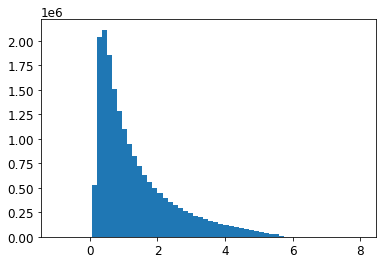

In [14]:
_=plt.hist(dfg['Ekine'],bins=60,range=[-1,8])

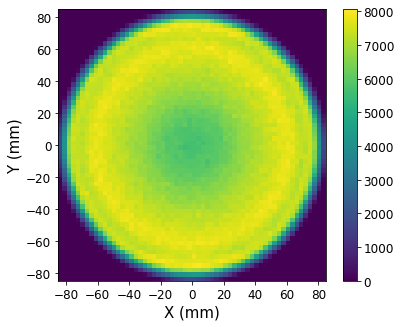

In [7]:
plt.figure(figsize=(6,5))
plt.hist2d(dfg['X'],dfg['Y'],bins=[60,60],range=([-85,85],[-85,85]))
plt.xlim(-85,85)
plt.ylim(-85,85)
plt.xticks(np.arange(-80,81,20))
plt.yticks(np.arange(-80,81,20))
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.colorbar()
plt.savefig("../PaperImages/Paper_PhS1_XY.png")

(array([ 16545.,  55211., 112182., 159708., 193115., 218543., 243581.,
        266684., 287148., 302436., 311921., 316358., 317339., 317510.,
        315502., 313095., 311169., 308073., 307152., 303567., 299725.,
        296441., 293518., 290865., 287155., 285790., 283489., 282561.,
        281138., 280041., 280184., 281606., 282148., 282616., 284946.,
        286933., 290409., 294061., 297332., 300792., 303364., 306345.,
        308608., 310015., 313346., 314797., 317061., 318600., 317096.,
        312456., 301905., 287219., 266463., 241601., 218170., 192822.,
        159974., 111520.,  55285.,  16589.]),
 array([-85.        , -82.16666667, -79.33333333, -76.5       ,
        -73.66666667, -70.83333333, -68.        , -65.16666667,
        -62.33333333, -59.5       , -56.66666667, -53.83333333,
        -51.        , -48.16666667, -45.33333333, -42.5       ,
        -39.66666667, -36.83333333, -34.        , -31.16666667,
        -28.33333333, -25.5       , -22.66666667, -19.83333333,
  

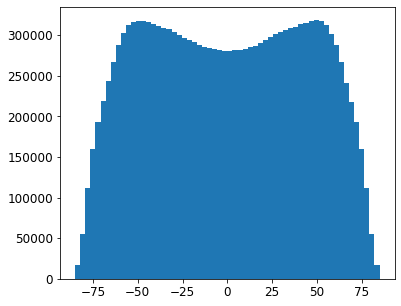

In [15]:
plt.figure(figsize=(6,5))
plt.hist(dfg['X'][dfg["Y"]<60][dfg["Y"]>-60],bins=60,range=(-85,85))
# plt.xlim(-85,85)
# plt.ylim(-85,85)
# plt.xticks(np.arange(-80,81,20))
# plt.yticks(np.arange(-80,81,20))
# plt.xlabel("X (mm)")
# plt.ylabel("Y (mm)")
# plt.colorbar()
# plt.savefig("../PaperImages/Paper_PhS1_XY.png")

(array([[6.000e+00, 5.900e+01, 3.910e+02, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [1.100e+01, 1.050e+02, 8.930e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.300e+01, 1.640e+02, 1.464e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [1.500e+01, 1.510e+02, 1.448e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.200e+01, 1.180e+02, 9.550e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.000e+00, 5.200e+01, 4.020e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([-8.49967194e+01, -8.21634950e+01, -7.93302706e+01, -7.64970463e+01,
        -7.36638219e+01, -7.08305976e+01, -6.79973732e+01, -6.51641488e+01,
        -6.23309245e+01, -5.94977001e+01, -5.66644758e+01, -5.38312514e+01,
        -5.09980270e+01, -4.81648027e+01, -4.53315783e+01, -4.24983540e+01,
        -3.96651296e+01, -3.68319052e+01, -3.39986809e+01, -3.11654565e+01,
        -2.83322322e+01, -2.54990078e+01, -2.26657834e+01, -1.983

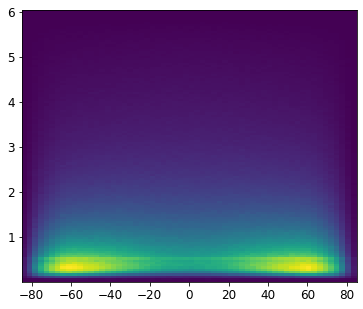

In [13]:
plt.figure(figsize=(6,5))
plt.hist2d(dfg['X'][dfg["Y"]<50][dfg["Y"]>-50],dfg['Ekine'][dfg["Y"]<50][dfg["Y"]>-50],bins=(60,120))

In [2]:
filenames_g=[
    "/work/lb8075/PhaseSpaces/PS1/PhS1AB_Gamma_ZeroBias/Skimmed_emoptstandard4_grev_output-PhS_Gate8p2_196.root",\
    "/work/lb8075/PhaseSpaces/PS1/PhS1AB_Gamma_ZeroBias_HighEn/Skimmed_output_196.root",\
    "/work/lb8075/PhaseSpaces/PS1/PhS1AB_Elec_ZeroBias_Take2/emoptstandard4_grev_output-PhS_Gate9p0_1*.root",\
    "/work/lb8075/PhaseSpaces/PS1/PhS1AB_Elec_ZeroBias_HighEn/output_1*.root",\
]


data_frame_dict={}
entries_SF={}

datasets=[]

for files_g in filenames_g:
    print(f"{files_g}   \n")
    particle=(files_g.split('/')[5]).split('_')[1]
    En="5.8 MeV"
    if "HighEn" in files_g:
        En="6.7 MeV"    

    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Ekine'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)       
    
    files_g=f"{particle} {En}"
    datasets.append(files_g)
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is
    sf=1.0
    if "Elec" in files_g:
        sf=1.0/111 ###using 111 electron files to 1 gamma
    
    entries_SF[files_g]=data_frame_dict[files_g]['X'].count()*sf

        

    data_frame_dict[files_g] = data_frame_dict[files_g].iloc[:1000000 , :]

    print(data_frame_dict[files_g]['X'].count())
print(datasets)

/work/lb8075/PhaseSpaces/PS1/PhS1AB_Gamma_ZeroBias/Skimmed_emoptstandard4_grev_output-PhS_Gate8p2_196.root   

1000000
/work/lb8075/PhaseSpaces/PS1/PhS1AB_Gamma_ZeroBias_HighEn/Skimmed_output_196.root   

1000000
/work/lb8075/PhaseSpaces/PS1/PhS1AB_Elec_ZeroBias_Take2/emoptstandard4_grev_output-PhS_Gate9p0_1*.root   

1000000
/work/lb8075/PhaseSpaces/PS1/PhS1AB_Elec_ZeroBias_HighEn/output_1*.root   

1000000
['Gamma 5.8 MeV', 'Gamma 6.7 MeV', 'Elec 5.8 MeV', 'Elec 6.7 MeV']


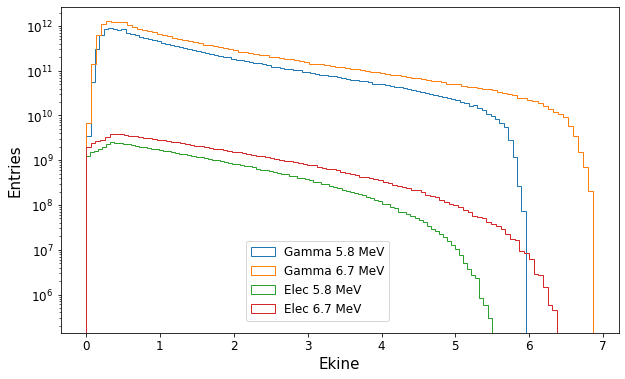

In [3]:
nbins=100
n_efiles=111

plt.figure(figsize=(10,6))
for files_g in datasets:
    SF=np.ones(1000000)*entries_SF[files_g]
    df=data_frame_dict[files_g]
    _=plt.hist(df['Ekine'],bins=nbins,histtype='step',label=files_g,weights=SF)
    plt.xlabel('Ekine')
    plt.ylabel('Entries')
    plt.yscale('log')
    plt.legend(loc='best', bbox_to_anchor=((0.6, 0.3)))

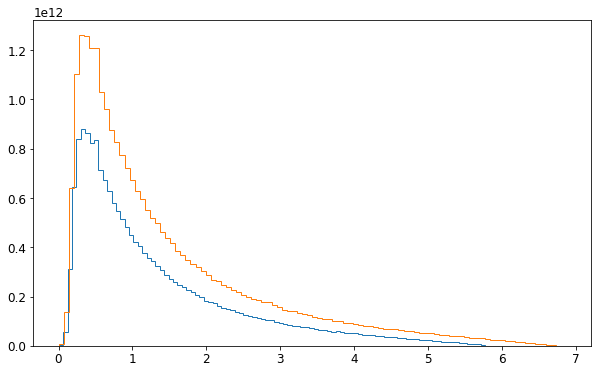

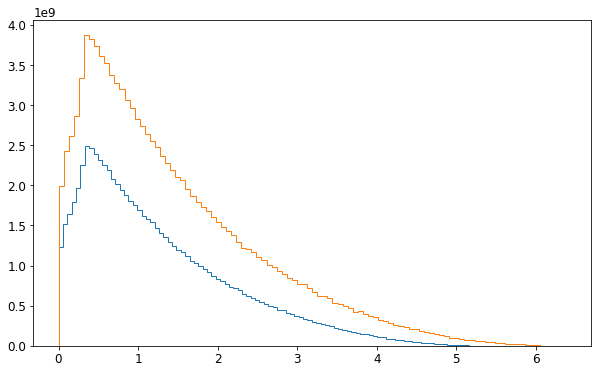

In [67]:
nbins=100
n_efiles=111

fig_gam,ax_gam=plt.subplots(1,1,figsize=(10,6))
fig_elec,ax_elec=plt.subplots(1,1,figsize=(10,6))
for files_g in datasets:
    SF=np.ones(1000000)*entries_SF[files_g]
    df=data_frame_dict[files_g]
    if "Elec" in files_g:
        _=ax_elec.hist(df['Ekine'],bins=nbins,histtype='step',label=files_g,weights=SF)
    else:
        _=ax_gam.hist(df['Ekine'],bins=nbins,histtype='step',label=files_g,weights=SF)
#     plt.xlabel('Ekine')
#     plt.ylabel('Entries')
#     plt.legend(loc='best', bbox_to_anchor=((0.6, 0.3)))

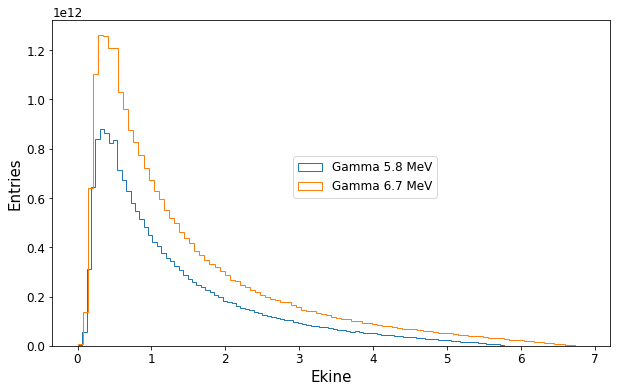

In [6]:
nbins=100
n_efiles=111

plt.figure(figsize=(10,6))
# fig_elec,ax_elec=plt.subplots(1,1,figsize=(10,6))
for files_g in datasets:
    SF=np.ones(1000000)*entries_SF[files_g]
    df=data_frame_dict[files_g]
    if "Elec" in files_g:
        continue
    else:
        _=plt.hist(df['Ekine'],bins=nbins,histtype='step',label=files_g,weights=SF)
    plt.xlabel('Ekine')
    plt.ylabel('Entries')
    plt.legend(loc='best', bbox_to_anchor=((0.7, 0.6)))

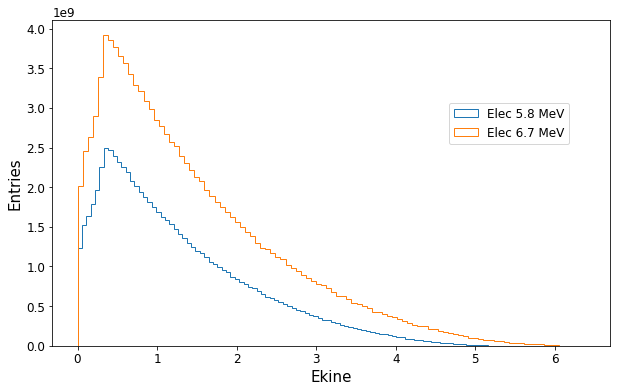

In [7]:
nbins=100
n_efiles=111

plt.figure(figsize=(10,6))
# fig_elec,ax_elec=plt.subplots(1,1,figsize=(10,6))
for files_g in datasets:
    SF=np.ones(1000000)*entries_SF[files_g]
    df=data_frame_dict[files_g]
    if "Gamma" in files_g:
        continue
    else:
        _=plt.hist(df['Ekine'],bins=nbins,histtype='step',label=files_g,weights=SF)
    plt.xlabel('Ekine')
    plt.ylabel('Entries')
    plt.legend(loc='best', bbox_to_anchor=((0.7, 0.6)))

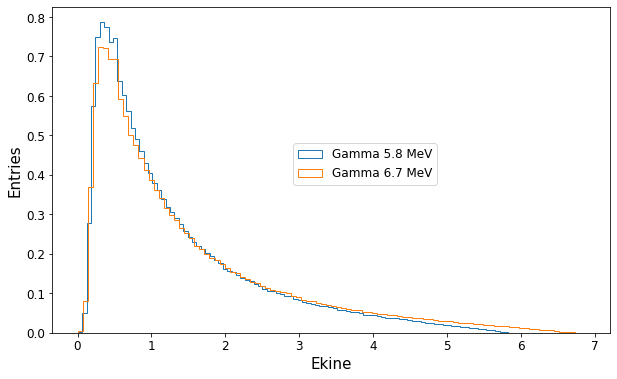

In [8]:
nbins=100
n_efiles=111

plt.figure(figsize=(10,6))
# fig_elec,ax_elec=plt.subplots(1,1,figsize=(10,6))
for files_g in datasets:
    SF=np.ones(1000000)*entries_SF[files_g]
    df=data_frame_dict[files_g]
    if "Elec" in files_g:
        continue
    else:
        _=plt.hist(df['Ekine'],bins=nbins,histtype='step',label=files_g,weights=SF,density=True)
    plt.xlabel('Ekine')
    plt.ylabel('Entries')
    plt.legend(loc='best', bbox_to_anchor=((0.7, 0.6)))

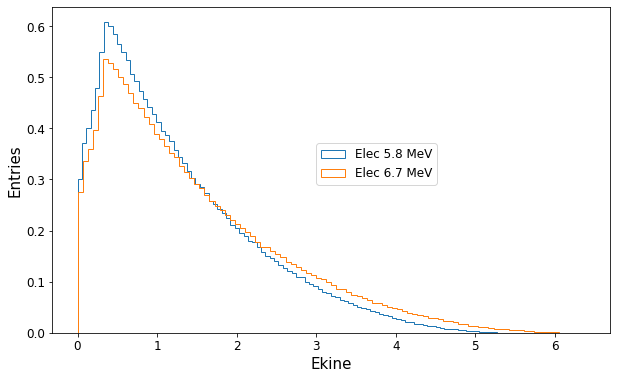

In [9]:
nbins=100
n_efiles=111

plt.figure(figsize=(10,6))
# fig_elec,ax_elec=plt.subplots(1,1,figsize=(10,6))
for files_g in datasets:
    SF=np.ones(1000000)*entries_SF[files_g]
    df=data_frame_dict[files_g]
    if "Gamma" in files_g:
        continue
    else:
        _=plt.hist(df['Ekine'],bins=nbins,histtype='step',label=files_g,weights=SF,density=True)
    plt.xlabel('Ekine')
    plt.ylabel('Entries')
    plt.legend(loc='best', bbox_to_anchor=((0.7, 0.6)))

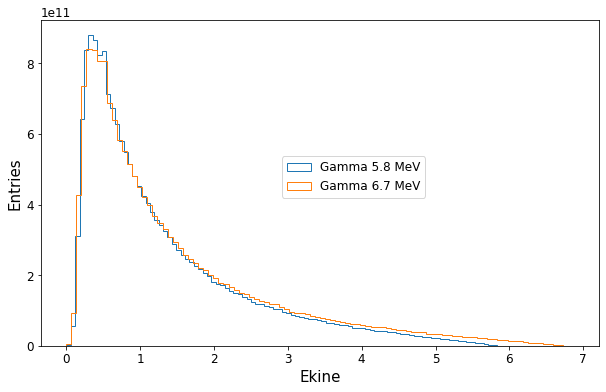

In [11]:
nbins=100
n_efiles=111

plt.figure(figsize=(10,6))
# fig_elec,ax_elec=plt.subplots(1,1,figsize=(10,6))
for files_g in datasets:
    SF=np.ones(1000000)*entries_SF[files_g]
    df=data_frame_dict[files_g]
    if "6.7" in files_g:
        SF/=1.5
    if "Elec" in files_g:
        continue
    else:
        _=plt.hist(df['Ekine'],bins=nbins,histtype='step',label=files_g,weights=SF)
    plt.xlabel('Ekine')
    plt.ylabel('Entries')
    plt.legend(loc='best', bbox_to_anchor=((0.7, 0.6)))

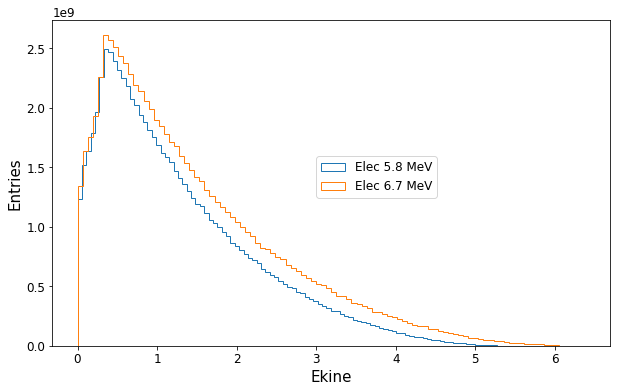

In [12]:
nbins=100
n_efiles=111

plt.figure(figsize=(10,6))
# fig_elec,ax_elec=plt.subplots(1,1,figsize=(10,6))
for files_g in datasets:
    SF=np.ones(1000000)*entries_SF[files_g]
    df=data_frame_dict[files_g]
    if "6.7" in files_g:
        SF/=1.5
    if "Gamma" in files_g:
        continue
    else:
        _=plt.hist(df['Ekine'],bins=nbins,histtype='step',label=files_g,weights=SF)
    plt.xlabel('Ekine')
    plt.ylabel('Entries')
    plt.legend(loc='best', bbox_to_anchor=((0.7, 0.6)))